### 벡터라이제이션

- 벡터 : 크기와 방향을 가지는 물리량
- 1D array : 여러개의 숫자를 한줄로 배열
- 벡터 공간을 이루는 단위 원소

- 벡터의 기하학적 의미
    - 하나의 벡터는 n차원 공간의 위치를 가짐, 위상 공간 안에서
    - 차원은 원소의 수 

- 단어의 유사도는? : 벡터 공간의 거리로 표현 가능하다.
- 벡터의 공간상 위치는 : 해당 벡터의 고유한 특성을 반영한다.

> 비슷한 위치 = 높은 유사도 = 유사한 특성 <br>
> 유클리디안, 코사인 유사도 등 사용 (거리와 방향) <br>
> L2 = 유클라디안 <br>
> L1 = 맨하튼 <br>

In [15]:
# 벡터 거리 계산
import numpy as np
import pandas as pd

v1 = np.array([1,2])
v2 = np.array([2,2])

np.linalg.norm(v1-v2) # 유클리디안 거리

np.float64(1.0)

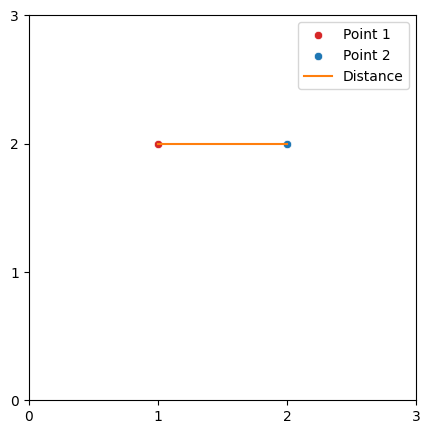

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5))

sns.scatterplot(x=[v1[0]], y=[v1[1]],c="tab:red", label='Point 1', ax = ax)
sns.scatterplot(x=[v2[0]], y=[v2[1]],c="tab:blue", label='Point 2', ax = ax)
sns.lineplot(x=v1, y=v2, c="tab:orange" ,label='Distance', ax = ax, )
ax.set_xlim((0,3))
ax.set_ylim((0,3))
ax.set_xticks(range(0,4,1))
ax.set_yticks(range(0,4,1));

L1 Norm = 맨해튼 거리
L2 Norm = 유클리드 거리
Norm = 벡터의 길이를 측정하는 방법

### 코사인 거리
- 코사인 거리 계산
    - 내적 : $a \cdot b = |a| |b| cos \theta$<br>$\therefore cos \theta = \frac{a \cdot b}{|a||b|}$

- 코사인 거리 = $1 - cos\theta$

In [17]:
# 코사인 유사도 계산
import numpy as np

v1 = np.array([1,2])
v2 = np.array([2,2])
c1 = np.array([-2,-1])

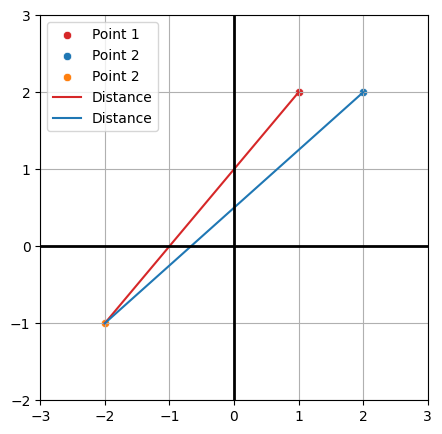

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5))

sns.scatterplot(x=[v1[0]], y=[v1[1]],c="tab:red", label='Point 1', ax = ax)
sns.scatterplot(x=[v2[0]], y=[v2[1]],c="tab:blue", label='Point 2', ax = ax)
sns.scatterplot(x=[c1[0]], y=[c1[1]],c="tab:orange", label='Point 2', ax = ax)

sns.lineplot(x=[c1[0],v1[0]], y=[c1[1],v1[1]], c="tab:red" ,label='Distance', ax = ax, )
sns.lineplot(x=[c1[0],v2[0]], y=[c1[1],v2[1]], c="tab:blue" ,label='Distance', ax = ax, )

ax.axvline(x=0, color='black', linestyle='-', linewidth=2)
ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
ax.set_xlim((-3,3))
ax.set_ylim((-2,3))

ax.grid(True)
ax.set_xticks(range(-3,4,1))
ax.set_yticks(range(-2,4,1));

In [19]:
cos_theta = np.dot(v1,v2) / (np.abs(np.linalg.norm(v1)) * np.abs(np.linalg.norm(v2)))
print('코사인 유사도',cos_theta)
print('코사인 거리',1 - cos_theta)

코사인 유사도 0.9486832980505138
코사인 거리 0.05131670194948623


### CountVectorizer, TfidfVectorizer

In [20]:
from sklearn.feature_extraction.text import CountVectorizer # frequency based DTM
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM

In [21]:
TEXT = ['banana apple apple eggplant',
        'orange carrot banana eggplant',
        'apple carrot banana banana',
        'orange banana grape'
]

TXT = "banana apple apple eggplant orange carrot banana eggplant apple carrot banana banana orange banana grape"


- CounterVectorizer

In [22]:
# tf_vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))
tf_vectorizer = CountVectorizer(min_df=1, ngram_range=(1,2))  # 최수 빈도수 정의 # 그램 정의(유니그램(단일 단어)만 고려)
tf_features = tf_vectorizer.fit_transform(TEXT)

In [23]:
# n 그램 이해
import nltk
from nltk import ngrams

def getNgramWord(N,txt):
    txt = txt.split()
    ngrams = [txt[i:i+N] for i in range(len(txt)-N+1)]
    return ngrams

print("1-gram : " + str(getNgramWord(1, TXT))) # unigram
print("2-gram : " + str(getNgramWord(2, TXT))) # bigram
print("3-gram : " + str(getNgramWord(3, TXT))) # trigram

1-gram : [['banana'], ['apple'], ['apple'], ['eggplant'], ['orange'], ['carrot'], ['banana'], ['eggplant'], ['apple'], ['carrot'], ['banana'], ['banana'], ['orange'], ['banana'], ['grape']]
2-gram : [['banana', 'apple'], ['apple', 'apple'], ['apple', 'eggplant'], ['eggplant', 'orange'], ['orange', 'carrot'], ['carrot', 'banana'], ['banana', 'eggplant'], ['eggplant', 'apple'], ['apple', 'carrot'], ['carrot', 'banana'], ['banana', 'banana'], ['banana', 'orange'], ['orange', 'banana'], ['banana', 'grape']]
3-gram : [['banana', 'apple', 'apple'], ['apple', 'apple', 'eggplant'], ['apple', 'eggplant', 'orange'], ['eggplant', 'orange', 'carrot'], ['orange', 'carrot', 'banana'], ['carrot', 'banana', 'eggplant'], ['banana', 'eggplant', 'apple'], ['eggplant', 'apple', 'carrot'], ['apple', 'carrot', 'banana'], ['carrot', 'banana', 'banana'], ['banana', 'banana', 'orange'], ['banana', 'orange', 'banana'], ['orange', 'banana', 'grape']]


In [24]:
features = np.array(tf_features.todense())
print(np.linalg.norm(features[1]-features[2]))
print(np.linalg.norm(features[1]-features[0]))

2.8284271247461903
3.4641016151377544


In [25]:
# from sklearn.feature_extraction.text import CountVectorizer
feature_names = tf_vectorizer.get_feature_names_out()
feature_names

array(['apple', 'apple apple', 'apple carrot', 'apple eggplant', 'banana',
       'banana apple', 'banana banana', 'banana eggplant', 'banana grape',
       'carrot', 'carrot banana', 'eggplant', 'grape', 'orange',
       'orange banana', 'orange carrot'], dtype=object)

In [26]:
df = pd.DataFrame(data=features, columns=feature_names)
display(df)

apple  apple apple  apple carrot  apple eggplant  banana  banana apple  \
0      2            1             0               1       1             1   
1      0            0             0               0       1             0   
2      1            0             1               0       2             0   
3      0            0             0               0       1             0   

   banana banana  banana eggplant  banana grape  carrot  carrot banana  \
0              0                0             0       0              0   
1              0                1             0       1              1   
2              1                0             0       1              1   
3              0                0             1       0              0   

   eggplant  grape  orange  orange banana  orange carrot  
0         1      0       0              0              0  
1         1      0       1              0              1  
2         0      0       0              0              0  
3         0      1       1              1              0

- TfidfVectorizer

In [27]:
tfidf_vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1,1))TfidfVectorizer
tfidf_features = tfidf_vectorizer.fit_transform(TEXT)

In [28]:
tfidf_features = np.array(tfidf_features.todense())

In [29]:
df = pd.DataFrame(data=tfidf_features,
                  columns=tfidf_vectorizer.get_feature_names_out())
display(df)

apple    banana    carrot  eggplant     grape    orange
0  0.857643  0.283833  0.000000  0.428821  0.000000  0.000000
1  0.000000  0.356966  0.539313  0.539313  0.000000  0.539313
2  0.516233  0.683379  0.516233  0.000000  0.000000  0.000000
3  0.000000  0.379192  0.000000  0.000000  0.726641  0.572892